# General project information summary

In [ ]:
General project information summary
1. Data Loading
2. Data Familiarization
3. Data Cleaning
4. Data Transformation
5. Exploratory Data Analysis (EDA)
6. Descriptive Analysis
7. Diagnostic Analysis
8. Inferential Analysis
9. Predictive Analysis
10. Prescriptive Analysis

# 1. Data Loading

In [59]:
import pandas as pd
import numpy as np

# =============================================
# DataLoader Class (CSV + Excel)
# =============================================
class DataLoader:
    """Loads data from CSV or Excel files."""

    def __init__(self, filepath: str = None):
        self.filepath = filepath
        
    def load_csv(self, file_path: str) -> pd.DataFrame:
        """Load a CSV file into a DataFrame."""
        df = pd.read_csv(file_path)
        return df
    
    def load_excel(self, file_path: str, sheet_name: str = None) -> pd.DataFrame:
        """Load an Excel sheet into a DataFrame."""
        df = pd.read_excel(file_path, sheet_name=sheet_name)
        return df
        

In [60]:
data_loader = DataLoader()   

In [70]:
Orders_df = data_loader.load_excel(r"C:\Users\ajibo\Downloads\0. Rebrand\IT Projects\0. project portfolio\RetailNexus_Corp_Analytics\RetailNexus_Corp_Raw_Dataset.xlsx", sheet_name="Orders")
print (Orders_df.head(2))
print ('=================================================')
People_df = data_loader.load_excel(r"C:\Users\ajibo\Downloads\0. Rebrand\IT Projects\0. project portfolio\RetailNexus_Corp_Analytics\RetailNexus_Corp_Raw_Dataset.xlsx", sheet_name="People")
print (People_df.head(2))
print ('=================================================')
Returns_df = data_loader.load_excel(r"C:\Users\ajibo\Downloads\0. Rebrand\IT Projects\0. project portfolio\RetailNexus_Corp_Analytics\RetailNexus_Corp_Raw_Dataset.xlsx", sheet_name="Returns")
print(Returns_df.head(2))

C:\Users\ajibo\anaconda3\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


   Row ID        Order ID Order Date  Ship Date     Ship Mode Customer ID  \
0       1  CA-2018-152156 2018-11-08 2018-11-11  Second Class    CG-12520   
1       2  CA-2018-152156 2018-11-08 2018-11-11  Second Class    CG-12520   

  Customer Name   Segment Country/Region       City  ... Postal Code  Region  \
0   Claire Gute  Consumer  United States  Henderson  ...     42420.0   South   
1   Claire Gute  Consumer  United States  Henderson  ...     42420.0   South   

        Product ID   Category Sub-Category  \
0  FUR-BO-10001798  Furniture    Bookcases   
1  FUR-CH-10000454  Furniture       Chairs   

                                        Product Name   Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.96         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.94         3   

   Discount    Profit  
0       0.0   41.9136  
1       0.0  219.5820  

[2 rows x 21 columns]
          Person Region
0  Anna Andreadi   West
1    Chuck Magee   Eas

C:\Users\ajibo\anaconda3\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


  Returned        Order ID
0      Yes  CA-2016-100762
1      Yes  CA-2016-100762


C:\Users\ajibo\anaconda3\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [71]:
Orders_df.info()
print ('=================================================')
People_df.info()
print ('=================================================')
Returns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country/Region  9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Postal Code     9983 non-null   float64       
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9994 non-null   object        
 15  Sub-

# 2. Data Familiarization

In [77]:
import matplotlib.pyplot as plt

class DataFamiliarization:
    """To familiarize with the datasets"""
    
    @staticmethod
    def general_information(dataset_name):
        """Show .info() for the specified dataset"""
        df_info = dataset_name.info()
        return df_info

    @staticmethod
    def summary_statistics(dataset_name):
        """Show summary statistics for the specified dataset"""
        df_summary = dataset_name.describe()
        return df_summary

    @staticmethod
    def check_missing_values(dataset_name):
        """Check for null/missing values in all columns."""
        missing = dataset_name.isnull().sum()
        return missing

    @staticmethod
    def check_duplicated_rows(dataset_name):
        """Returns the total count of fully duplicated rows."""
        duplicate = dataset_name.duplicated().sum()
        return duplicate
    
    
    @staticmethod
    def show_valueCounts(df, column):
        """Show summary statistics for the specified dataset"""
        if column in df.columns:
            return df[column].value_counts(dropna=False)
        else:
            print(f"Column '{column}' not found.")
            return None
            
 
    @staticmethod
    def show_chart(df, column, chart_type):
        """Show chart for a column using specified chart type"""
        if column not in df.columns:
            print(f"Column '{column}' not found.")
            return
        df[[column]].plot(kind=chart_type, figsize=(6, 4), color='skyblue')
        plt.title(f'{chart_type.capitalize()} Chart of {column} column')
        plt.xlabel(column)
        plt.tight_layout()
        plt.show()

In [41]:
DataFamiliarization.general_information(Returns_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Returned  800 non-null    object
 1   Order ID  800 non-null    object
dtypes: object(2)
memory usage: 12.6+ KB


In [33]:
DataFamiliarization.summary_statistics(Orders_df)

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2018-04-30 10:03:51.979187712,2018-05-04 09:03:29.645787392,55245.233297,229.858001,3.789574,0.156203,28.656896
min,1.000000,2016-01-03 00:00:00,2016-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2017-05-23 00:00:00,2017-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2018-06-26 00:00:00,2018-06-29 00:00:00,57103.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2019-05-14 00:00:00,2019-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2019-12-30 00:00:00,2020-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32038.715955,623.245101,2.225110,0.206452,234.260108


In [74]:
print ('============== Orders_df ======================')
print (DataFamiliarization.check_missing_values(Orders_df))
print ('============== People_df ======================')
print (DataFamiliarization.check_missing_values(People_df))
print ('=============== Returns_df =====================')
print (DataFamiliarization.check_missing_values(Returns_df))

============== Orders_df ======================
Row ID             0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
Country/Region     0
City               0
State              0
Postal Code       11
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
dtype: int64
============== People_df ======================
Person    0
Region    0
dtype: int64
=============== Returns_df =====================
Returned    0
Order ID    0
dtype: int64


In [79]:
print ('============== Orders_df ======================')
print (DataFamiliarization.check_duplicated_rows(Orders_df))
print ('============== People_df ======================')
print (DataFamiliarization.check_duplicated_rows(People_df))
print ('=============== Returns_df =====================')
print (DataFamiliarization.check_duplicated_rows(Returns_df))

============== Orders_df ======================
0
============== People_df ======================
0
=============== Returns_df =====================
504


In [85]:
DataFamiliarization.show_valueCounts(Orders_df, 'Sales')

Sales
12.960     56
19.440     39
15.552     39
10.368     36
32.400     28
           ..
825.174     1
569.536     1
796.425     1
12.832      1
243.160     1
Name: count, Length: 6144, dtype: int64

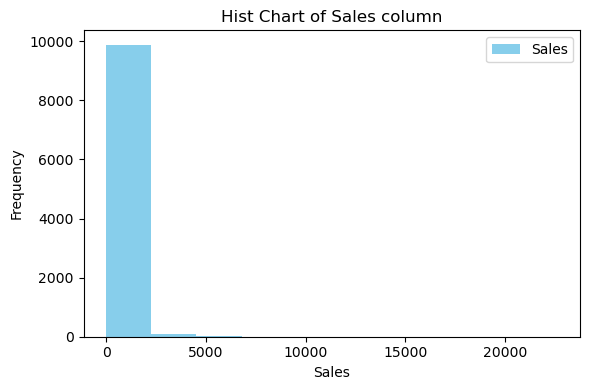

In [58]:
DataFamiliarization.show_chart(Orders_df, 'Sales', 'hist')

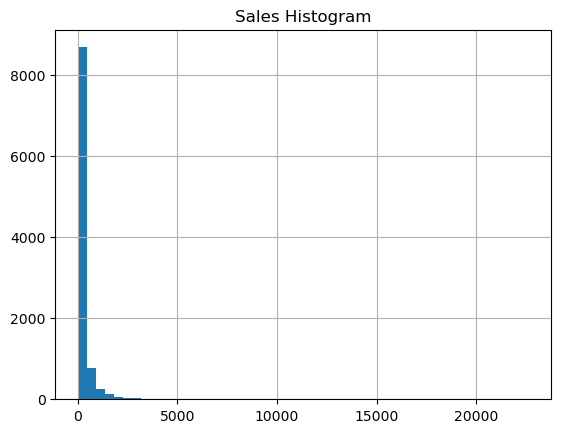

In [55]:
Orders_df['Sales'].hist(bins=50)
plt.title("Sales Histogram")
plt.show()

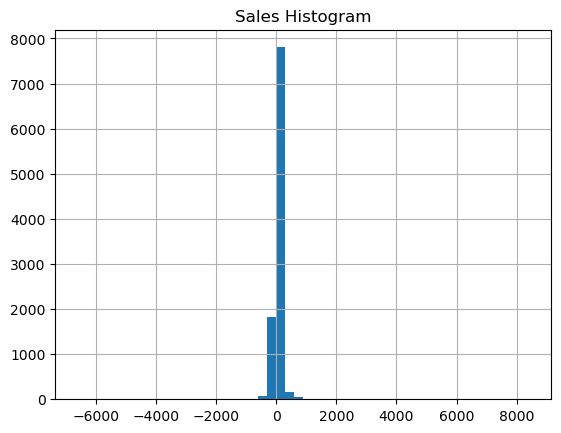

In [93]:
Orders_df['Profit'].hist(bins=50)
plt.title("Profit Histogram")
plt.show()

In [ ]:
progress update 

# 3. Data Cleaning

In [91]:
class DataCleaner:
    """To familiarize with the datasets"""
    
    @staticmethod
    def drop_missing_data(dataset_name):
        """drop missing values in the DataFrame"""
        dataset_drop = dataset_name.dropna()
        return dataset_drop

    @staticmethod
    def drop_duplicate_data(dataset_name):
        """drop missing values in the DataFrame"""
        dataset_drop = dataset_name.drop_duplicates()
        return dataset_drop
    
    @staticmethod
    def standardize_text_columns(dataset_name, cols):
        for col in cols:
            dataset_name[cols] = dataset_name[cols].astype(str).str.lower().str.strip().str.title()
        return dataset_name[cols]
    
    @staticmethod
    def log_transform_skewed_data(dataset_name, cols):
        """Log transform column to normalize distribution skewness"""
        dataset_name[cols] = np.log1p(dataset_name[cols])
        return dataset_name[cols]


# Log Transform


In [88]:
sample = Orders_df.copy()

In [89]:
sample.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [ ]:
sample.standardize_text_columns

In [92]:
DataCleaner.standardize_text_columns(sample, 'City')

0             Henderson
1             Henderson
2           Los Angeles
3       Fort Lauderdale
4       Fort Lauderdale
             ...       
9989              Miami
9990         Costa Mesa
9991         Costa Mesa
9992         Costa Mesa
9993        Westminster
Name: City, Length: 9994, dtype: object

# 4. Data Transformation

In [ ]:
5. Exploratory Data Analysis (EDA)¶

In [ ]:
6. Descriptive Analysis

In [ ]:
7. Diagnostic Analysis¶

In [ ]:
8. Inferential Analysis

In [ ]:
9. Predictive Analysis¶

In [ ]:
10. Prescriptive Analysis

In [ ]:
11. Reporting & visualization

In [ ]:
12. docuemnetation

In [ ]:
13. prof ways to extract value for bsns

In [ ]:
14. Business implementation